<a href="https://www.kaggle.com/code/mrsimple07/student-performance-prediction?scriptVersionId=166698158" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-exam-performance-prediction/student_exam_data_new.csv
/kaggle/input/student-exam-performance-prediction/student_exam_data.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/student-exam-performance-prediction/student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [3]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [4]:
df.info

<bound method DataFrame.info of      Study Hours  Previous Exam Score  Pass/Fail
0       4.370861            81.889703          0
1       9.556429            72.165782          1
2       7.587945            58.571657          0
3       6.387926            88.827701          1
4       2.404168            81.083870          0
..           ...                  ...        ...
495     4.180170            45.494924          0
496     6.252905            95.038815          1
497     1.699612            48.209118          0
498     9.769553            97.014241          1
499     9.875897            66.760346          1

[500 rows x 3 columns]>

In [5]:
df.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

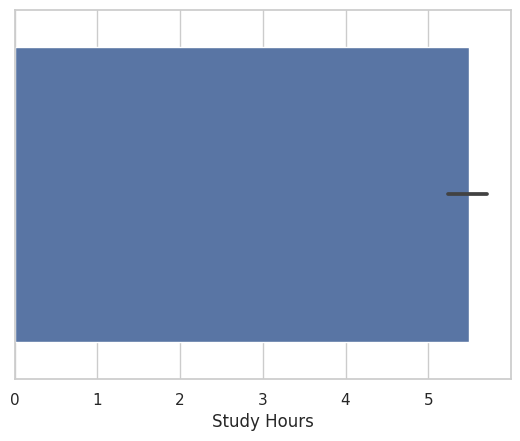

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

sns.barplot(x= df['Study Hours'])
plt.show()

We can use Logistic Regression to predict the score

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X,y = df.drop(['Pass/Fail'], axis =1), df['Pass/Fail']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.86
